=== a) Interface + flux ===
x_Ai = 0.16893444198795102
y_Ai = 0.10245909270602628
N_A (avg film) = 0.0002630927457084065 kgmol/(s*m^2)
N_A (gas film) = 0.00026309274570823044
N_A (liq film) = 0.0002630927457085826

=== b) Overall gas-basis coefficients + flux ===
y_A* at x_AL = 0.022
(1-yA)_BM = 0.8589626194901738
Ky = K'y/(1-y)_BM = 0.0011539155513524328
K'y = 0.0009911703246601338
N_A from overall gas-basis = 0.0002630927457083547

=== c) Overall liquid-basis coefficients + flux ===
x_A* at y_AG = 0.29178660004411383
(1-xA)_BM = 0.8231971316866937
Kx = K'x/(1-x)_BM = 0.0010881196297081912
K'x = 0.0008957369581077703
N_A from overall liquid-basis = 0.0002630927457084037


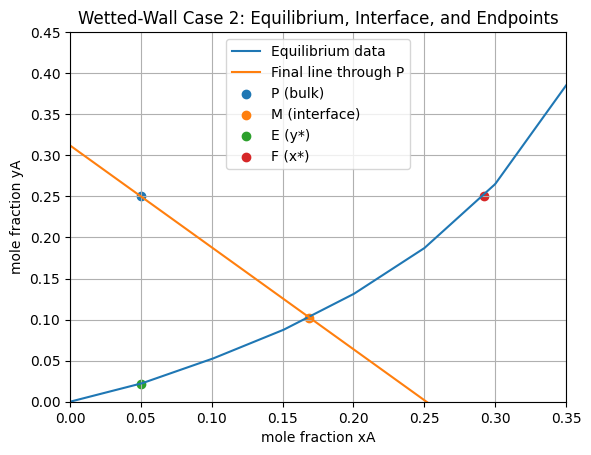

In [ ]:
# notebook cell: 22.1-8.py

import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from bank.Tower.two_film_base import (
    WettedWallTwoFilmTableSpec,
    solve_wetted_wall_two_film_from_table,
)

# Given
yAG = 0.25
xAL = 0.05

# Equilibrium data (xA, yA)
x_table = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35]
y_table = [0.00, 0.022, 0.052, 0.087, 0.131, 0.187, 0.265, 0.385]

# Film coefficients (case sensitive: k'x, k'y)
ky = 1.465e-3
kx = 1.967e-3

spec = WettedWallTwoFilmTableSpec(
    x_table=x_table,
    y_table=y_table,
    k_y=ky,
    k_x=kx,
    y_AG=yAG,
    x_AL=xAL,
    max_iter=50,
    tol_slope=1e-10,
)

res = solve_wetted_wall_two_film_from_table(spec)

# a) Interface + film-flux
xi = res["interface"]["x_Ai"]
yi = res["interface"]["y_Ai"]

NA_film = res["flux"]["N_A"]
NA_gfilm = res["flux"]["N_A_from_gas_film"]
NA_lfilm = res["flux"]["N_A_from_liq_film"]

# b) Overall gas basis
Ky_prime = res["overall"]["Ky_prime"]
Ky = res["overall"]["Ky_overall"]         # Ky = K'y/(1-y)BM
NA_overall_y = res["flux"]["N_A_from_overall_y"]

# c) Overall liquid basis
Kx_prime = res["overall"]["Kx_prime"]
Kx = res["overall"]["Kx_overall"]         # Kx = K'x/(1-x)BM
NA_overall_x = res["flux"]["N_A_from_overall_x"]

# Endpoints and BM factors
y_star = res["equilibrium_endpoints"]["y_A_star_at_xAL"]
x_star = res["equilibrium_endpoints"]["x_A_star_at_yAG"]
one_minus_y_BM = res["equilibrium_endpoints"]["one_minus_y_BM"]
one_minus_x_BM = res["equilibrium_endpoints"]["one_minus_x_BM"]

print("=== a) Interface + flux ===")
print("x_Ai =", xi)
print("y_Ai =", yi)
print("N_A (avg film) =", NA_film, "kgmol/(s*m^2)")
print("N_A (gas film) =", NA_gfilm)
print("N_A (liq film) =", NA_lfilm)

print("\n=== b) Overall gas-basis coefficients + flux ===")
print("y_A* at x_AL =", y_star)
print("(1-yA)_BM =", one_minus_y_BM)
print("Ky = K'y/(1-y)_BM =", Ky)
print("K'y =", Ky_prime)
print("N_A from overall gas-basis =", NA_overall_y)

print("\n=== c) Overall liquid-basis coefficients + flux ===")
print("x_A* at y_AG =", x_star)
print("(1-xA)_BM =", one_minus_x_BM)
print("Kx = K'x/(1-x)_BM =", Kx)
print("K'x =", Kx_prime)
print("N_A from overall liquid-basis =", NA_overall_x)

# Plot equilibrium + final PM line + points
x_grid = np.linspace(min(x_table), max(x_table), 600)
y_grid = np.interp(x_grid, x_table, y_table)

slope = res["iteration"]["slope_final"]
y_line = yAG + slope * (x_grid - xAL)

plt.figure()
plt.plot(x_grid, y_grid, label="Equilibrium data")
plt.plot(x_grid, y_line, label="Final line through P")
plt.scatter([xAL], [yAG], label="P (bulk)", marker="o")
plt.scatter([xi], [yi], label="M (interface)", marker="o")
plt.scatter([xAL], [y_star], label="E (y*)", marker="o")
plt.scatter([x_star], [yAG], label="F (x*)", marker="o")
plt.xlabel("mole fraction xA")
plt.ylabel("mole fraction yA")
plt.title("Wetted-Wall Case 2: Equilibrium, Interface, and Endpoints")
plt.xlim(0.0, max(x_table))
plt.ylim(0.0, max(0.45, max(y_table)))
plt.grid(True)
plt.legend()
plt.show()